In [5]:
"""
优化参数使用
"""
from datetime import datetime
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting

from research_strategies.breaker.r_break_strategy_3 import RBreakStrategy
# from research_strategies.turtle.turtle_strategy_3 import TurtleStrategy

2020-01-11 13:40:36.706436	开始加载历史数据
2020-01-11 13:40:36.721396	历史数据加载完成，数据量：355760
2020-01-11 13:40:36.754347	策略初始化完成
2020-01-11 13:40:36.755346	开始回放历史数据
2020-01-11 13:40:46.750519	历史数据回放结束
2020-01-11 13:40:46.751515	开始计算逐日盯市盈亏
2020-01-11 13:40:46.760489	逐日盯市盈亏计算完成
2020-01-11 13:40:46.761488	开始计算策略统计指标
2020-01-11 13:40:46.770463	------------------------------
2020-01-11 13:40:46.770463	首个交易日：	2016-02-03
2020-01-11 13:40:46.770463	最后交易日：	2019-12-27
2020-01-11 13:40:46.770463	总交易日：	950
2020-01-11 13:40:46.770463	盈利交易日：	84
2020-01-11 13:40:46.771461	亏损交易日：	187
2020-01-11 13:40:46.771461	起始资金：	1,000,000.00
2020-01-11 13:40:46.771461	结束资金：	192,469.15
2020-01-11 13:40:46.771461	总收益率：	-80.75%
2020-01-11 13:40:46.771461	年化收益：	-20.40%
2020-01-11 13:40:46.772458	最大回撤: 	-811,734.10
2020-01-11 13:40:46.772458	百分比最大回撤: -80.83%
2020-01-11 13:40:46.772458	最长回撤天数: 	1369
2020-01-11 13:40:46.772458	总盈亏：	-807,530.85
2020-01-11 13:40:46.772458	总手续费：	52,930.85
2020-01-11 13:40:46.772458	总滑点：	61,400.00
2020

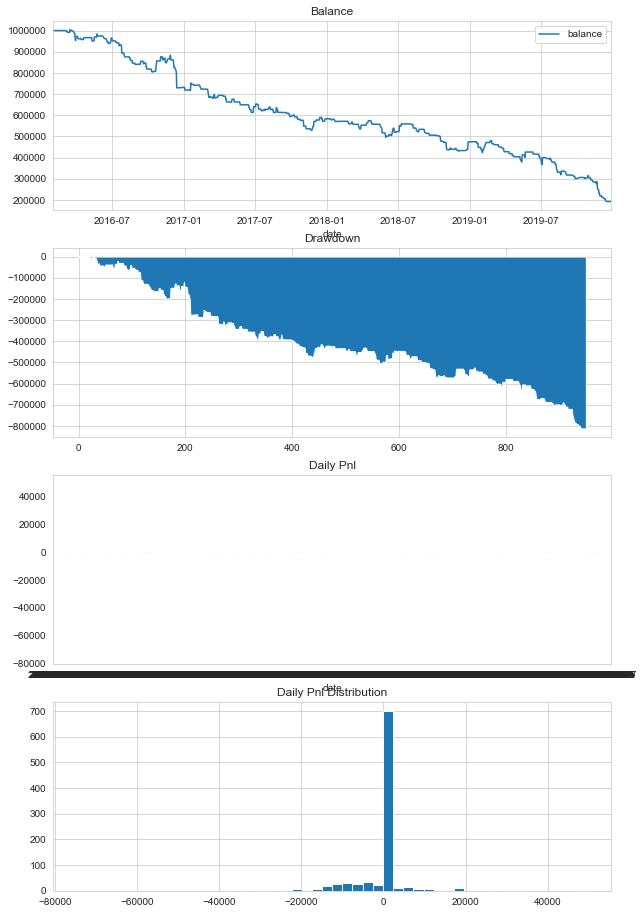

In [6]:
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="SR889.CZCE",
    interval="1m",
    start=datetime(2015, 1, 1),
    end=datetime(2019, 12, 30),
    rate=0.3/10000,  # 保证金比例
    slippage=0.2,  # 滑点
    size=10,  # 合约乘数
    pricetick=0.2,
    capital=1_000_000,
)
engine.add_strategy(RBreakStrategy, {
    'break_rate': 0.5,
    'stop_rate': 0.6,
    'tend_length': 20,
    'fixed_size': 50
})
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [ ]:
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("break_rate", 0.4, 0.6, 0.1)
setting.add_parameter("stop_rate", 0.4, 0.6, 0.1)
setting.add_parameter("tend_length", 10, 30, 2)

engine.run_ga_optimization(setting)